# Web APIs & Classification

## Project Challenge Statement

### Goal: 
#### 1. Using Reddit's API, collect posts from two subreddits: AskWomen, Relationship_Advice. 
#### 2. NLP to train a classifier on which subreddit a given post came from. This is a binary classification problem.

---

### Datasets: 
1. AskWomen vs Relationship Advice (1, 0)

---

### Model Improvement
Use all baseline models with gridsearch parameters in the previous notebook to build ensemble model. 

---


### Ensemble Model 
- with CountVectorizer 
- with TFIDF Model
- with Logistic Regression 
- with Multinomial NB
- with RandomForestClassifier
- with ExtraTreesClassifier
- with AdaBoostClassifier
- with SVM

----

### Notebook Walkthrough 
1. Build ensemble model 
    - `RelationshipAdvice:0, AskWomen:1`
2. Evaluate model 
3. Plot keywords with highest coefficients 

---


## Table of Contents 

This Notebook is broken down into different sections for analysis purpose. The following links are connected to differenct section within the Notebook for simple navigation. 

### Contents:
- [Ensamble Model : With womenrelationship_df](#Ensamble-Model-:-With-womenrelationship_df)
    - [Model Evaluation](#Model1-Evaluation)
    - [Extracting Keywords Coefficients](#Extracting-Keywords-Coefficients)
    - [Words-EDA](#Words-EDA)
    - [Visualizing Words With Highest Coefficients](#Visualizing-Words-With-Highest-Coefficients)
- [Model With Target Switched](#Model-With-Target-Switched)
    - [Ensemble Model 2: With womenrelationship_df](#Ensemble-Model-2:-With-womenrelationship_df)
    - [Model2 Evaluation](#Model2-Evaluation)
    - [Extracting Keywords Coefficients](#Extracting-Keywords-Coefficients)
    - [Visualizing Words With Highest Coefficients](#Visualizing-Words-With-Highest-Coefficients)
    
    
---

In [411]:
# !pip install pactools
import warnings
warnings.filterwarnings('ignore')

In [412]:
import pandas as pd 
import numpy as np 
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from pactools.grid_search import GridSearchCVProgressBar
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier

####  In this dataframe, the target is RelatoinshipAdvice
```
dic = { "RelationshipAdvice": 0, "AskWomen": 1}
```

In [413]:
womenrelationship_df = pd.read_csv('../data/AskWomen_Relationship.csv')
womenrelationship_df['Subreddit'].value_counts()

0    984
1    723
Name: Subreddit, dtype: int64

In [414]:
X = womenrelationship_df["Title_Content"]
y = womenrelationship_df['Subreddit']

#Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

# Ensemble Model 2

## Ensemble Model : With womenrelationship_df

In [415]:
# models with Best Parameters from previous notebook
mnb = MultinomialNB()
logit = LogisticRegression()
rf = RandomForestClassifier(max_depth = 100, 
                            min_samples_leaf= 2, 
                           n_estimators= 100)
et = ExtraTreesClassifier( max_depth = 100, 
                           min_samples_leaf = 3, 
                           n_estimators = 50)
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth = 200), 
                         learning_rate = 0.9, 
                         n_estimators = 200)
svm = svm.SVC(C= 0.5, kernel= 'linear')

In [434]:
#building Pipeline
pipe2 = Pipeline([     
#       ('cvec1', CountVectorizer(max_df= 0.95, 
#                        max_features= 1500, 
#                        min_df= 2, 
#                        ngram_range= (1,1))), 
    
#       ('cvec2', CountVectorizer(max_df= 0.95, 
#                        max_features= 1000, 
#                        min_df= 5, 
#                        ngram_range= (1,1))), 
    
#       ('tfidf1', TfidfVectorizer(max_df= 0.95, 
#                        max_features= 2000, 
#                        min_df= 2, 
#                        ngram_range= (1,2))),
     
     ('tfidf2',  TfidfVectorizer(max_df= 0.95, 
                       max_features= 1500, 
                       min_df= 5, 
                       ngram_range= (1,2))),
     
    ('vc', VotingClassifier(estimators= [('mnb', mnb), 
                                         ('logit', logit), 
                                         ('rf', rf),  
                                         ('et', et), 
                                         ('ada', ada),
                                         ('svm', svm)], 
                     voting = 'hard'))
])

In [435]:
#checking baseline CrossValidation Score 
cross_val_score(pipe2, X_train, y_train, cv = 10).mean()

0.9765329012961118

In [436]:
pipe2.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf2', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=1500, min_df=5,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=Tru....001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None))])

In [437]:
print('train score', pipe2.score(X_train, y_train))
print('test score', pipe2.score(X_test, y_test))

train score 0.9899497487437185
test score 0.9746588693957114


In [438]:
#make prediction 
predict = pipe2.predict(X_train)

In [439]:
test_predct = pipe2.predict(X_test)

## Model Evaluation 

### Train Data Confusion Matrix

In [440]:
from sklearn.metrics import confusion_matrix

In [441]:
confusion_matrix(y_true= y_train, y_pred= predict)

array([[678,  10],
       [  2, 504]])

In [442]:
tn, fp, fn, tp = confusion_matrix(y_true= y_train, y_pred= predict).ravel()
(tn, fp, fn, tp)

(678, 10, 2, 504)

In [345]:
#precision 
tp/(tp+fp)

0.9980276134122288

In [443]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, predict)

0.9907562735545546

### Test Data Confusion Matrix

In [444]:
confusion_matrix(y_true= y_test, y_pred = test_predct)

array([[289,   7],
       [  6, 211]])

In [445]:
tn, fp, fn, tp = confusion_matrix(y_true= y_test, y_pred = test_predct).ravel()
(tn, fp, fn, tp)

(289, 7, 6, 211)

In [446]:
#precision 
tp/(tp+fp)

0.9678899082568807

In [447]:
roc_auc_score(y_train, predict)

0.9907562735545546

## Extracting Keywords Coefficients

In [448]:
pipe2.named_steps['vc'].estimators_

[MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=100, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=

In [449]:
#extracting coefficients 
mnb2_coef = pipe2.named_steps['vc'].estimators_[0].coef_[0]

logit2_coef = pipe2.named_steps['vc'].estimators_[1].coef_[0]
len(mnb2_coef)

1500

In [451]:
#get column names for man relationship columns
tfidf = TfidfVectorizer(max_df= 0.95, 
                       max_features= 1500, 
                       min_df= 5, 
                       ngram_range= (1,2))

X_train_tfidf = tfidf.fit_transform(X_train)

#Saving column name
col_name2 = tfidf.get_feature_names()
len(col_name2)

1500

In [452]:
#Transforming Data to array
X_train_tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.23464461],
       [0.        , 0.        , 0.06381813, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02823897, 0.02845002, 0.03895388, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.18418143, ..., 0.        , 0.        ,
        0.02411878],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [453]:
#turining counts into dataframe
relationship_word = pd.DataFrame(X_train_tfidf.toarray(), 
                       columns= col_name2)

relationship_word .insert(0, 'Subreddit', y)
relationship_word.head()

,Subreddit,able,able to,about,about her,about him,about how,about it,about me,about months,...,you,you and,you feel,you have,you know,you re,you think,you ve,young,your
0,1,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.159695,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.234645
1,1,0.00000,0.000000,0.063818,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000
2,1,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.162498,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000
3,1,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.335896,0.0,0.0,0.0,0.0,0.00000,0.225897,0.0,0.0,0.185078
4,1,0.05058,0.050958,0.023258,0.0,0.0,0.0,0.0,0.0,0.0,...,0.020728,0.0,0.0,0.0,0.0,0.05372,0.000000,0.0,0.0,0.000000


In [454]:
#Building relationship word dataframe 
relationship_word = relationship_word.groupby('Subreddit').sum().T

In [455]:
relationship_word.columns = ['AskWomen', 'RelationshipAdvice']
relationship_word.to_csv('../data/Relatioinship0AskWomen1wordcount.csv')
relationship_word.head()

,AskWomen,RelationshipAdvice
able,1.306171,2.857767
able to,1.315933,2.421767
about,15.074853,24.812091
about her,1.399937,2.332591
about him,0.952312,1.070037


In [456]:
#Building Word Dataframe with their individual coefficients 
womenrelationship_word = pd.DataFrame(data= [mnb2_coef, logit2_coef], columns= col_name2, index= ['nb_coef', 'logit_coef'])
womenrelationship_word = womenrelationship_word.T
womenrelationship_word.to_csv('../data/Relatioinship0AskWomen1wordcoeff.csv')
womenrelationship_word.head()

,nb_coef,logit_coef
able,-7.415600,0.063575
able to,-7.641679,0.035638
about,-5.861976,-0.650305
about her,-8.129530,-0.141794
about him,-8.129530,-0.094078


## Words EDA

In [504]:
#sort by coeffients from high to low 
womenrelationship_word.sort_values(by = 'nb_coef', ascending= False ).head(20)

,nb_coef,logit_coef
you,-3.751280,3.546970
your,-4.070718,2.248796
what,-4.148849,2.811666
do you,-4.518230,1.729328
do,-4.833713,0.129620
the,-4.856414,-0.636384
to,-4.859047,-2.479212
how,-4.859993,0.563154
what is,-5.112346,1.289274
what are,-5.113371,1.055633


### Visualizing Words With Highest Coefficients

In [510]:
#Naive Bayes Coefficients From High to Low 
nb_idex = womenrelationship_word.sort_values(by = 'nb_coef', ascending= False).head(20).index

In [511]:
relationship_word.loc[nb_idex,]

,AskWomen,RelationshipAdvice
you,36.010009,56.960820
your,27.530036,34.343546
what,27.290648,41.206760
do you,15.979241,23.144262
do,18.818749,29.969438
the,39.056518,57.914291
to,52.960465,85.770449
how,19.272961,26.344157
what is,7.041509,13.008830
what are,9.453087,11.069997


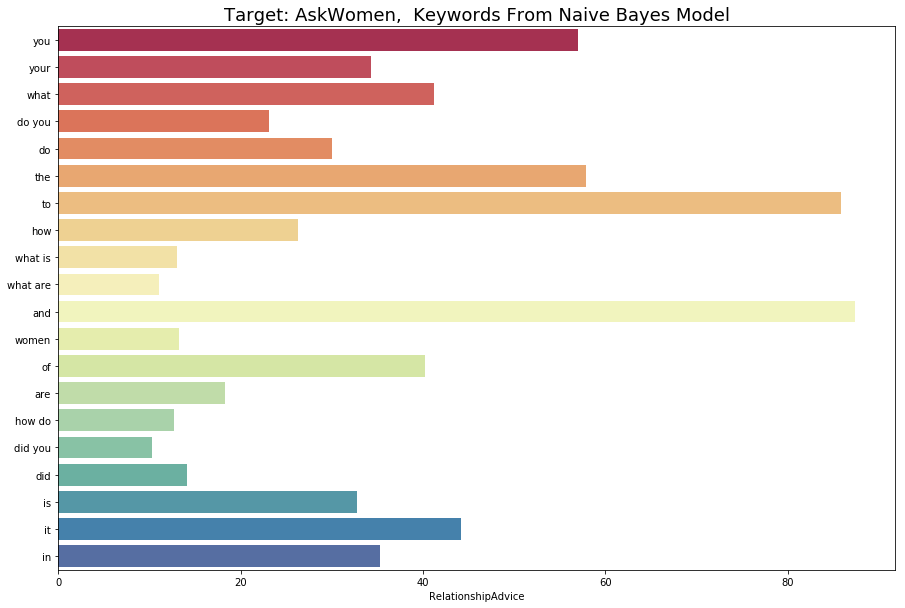

In [512]:
#plot counts 
plt.figure(figsize = (15,10))
plt.title('Target: AskWomen,  Keywords From Naive Bayes Model', fontsize = 18)
sns.barplot(y = relationship_word.loc[nb_idex,].index, 
            x = relationship_word.loc[nb_idex,]['RelationshipAdvice'],
            palette="Spectral")
plt.savefig('../images/AskWomen(1)NB.png')

In [461]:
womenrelationship_word.sort_values(by = 'logit_coef', ascending= False).head(20)

,nb_coef,logit_coef
you,-3.751280,3.546970
what,-4.148849,2.811666
your,-4.070718,2.248796
do you,-4.518230,1.729328
women,-5.194354,1.404916
what is,-5.112346,1.289274
what are,-5.113371,1.055633
did you,-5.312946,0.990316
ladies,-5.574215,0.968368
how did,-5.663323,0.818149


In [462]:
#Naive Bayes Coefficients From High to Low 
logreg_idex = womenrelationship_word.sort_values(by = 'logit_coef', ascending= False).head(20).index

In [463]:
relationship_word.loc[logreg_idex,]

,AskWomen,RelationshipAdvice
you,36.010009,56.960820
what,27.290648,41.206760
your,27.530036,34.343546
do you,15.979241,23.144262
women,6.471111,13.190624
what is,7.041509,13.008830
what are,9.453087,11.069997
did you,5.901974,10.263426
ladies,4.900904,7.310869
how did,5.841565,5.499369


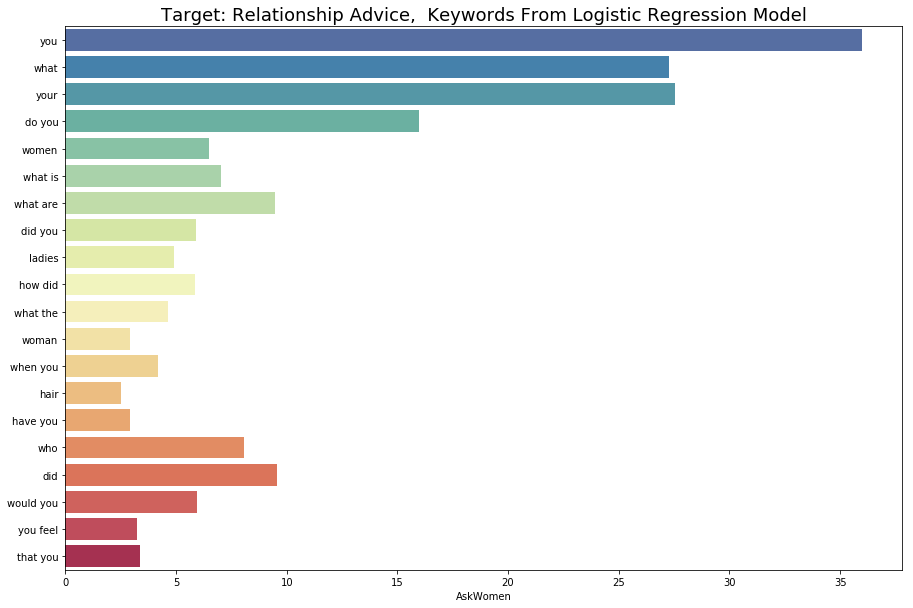

In [513]:
#plot counts 
plt.figure(figsize = (15,10))
plt.title('Target: Relationship Advice,  Keywords From Logistic Regression Model', fontsize = 18)
sns.barplot(y = relationship_word.loc[logreg_idex,].index, 
            x = relationship_word.loc[logreg_idex,]['AskWomen'],
            palette="Spectral_r")
plt.savefig('../images/AskWomen(1)logreg.png')

---
# Model With Target Switched

---

### Explaination 

In the previous steps with dataframe women and relationship advice, this model uses dictionary: 
```
dic = { "AskWomen": 1, "RelationshipAdvice": 0}
```

In the following section, I will swtich the target and analyze the keywords again. with new dictionary: 
```
dic = {1: 0, 0: 1 }
dic = { "AskWomen": 0, "RelationshipAdvice": 1}
```


---

In [465]:
womenrelationship_df['Subreddit'].value_counts()

0    984
1    723
Name: Subreddit, dtype: int64

In [466]:
#switching target. 
dic = {0: 1, 1: 0}
womenrelationship_df2 = womenrelationship_df
womenrelationship_df2['Subreddit'] = womenrelationship_df2['Subreddit'].map(dic)

In [467]:
print(womenrelationship_df2['Subreddit'].value_counts())
womenrelationship_df2.head()

1    984
0    723
Name: Subreddit, dtype: int64


,Unnamed: 0,Subreddit,Title_Content
0,0,0,Welcome to a new season Spring Fall AskWomen ...
1,1,0,What was a time you had to let a dream i e c...
2,2,0,What s the lamest thing you ever did to get a ...
3,3,0,Global check in how is everyone with anxiety ...
4,4,0,What s the dumbest reason someone decided not ...


## Ensemble Model 2: With womenrelationship_df

In [470]:
#train-test-split 
X = womenrelationship_df2["Title_Content"]
y = womenrelationship_df2['Subreddit']

#Train Test Split 
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [471]:
#Building Pipeline2 
#building Pipeline
pipe2 = Pipeline([
    ('tfidf2',  TfidfVectorizer(max_df= 0.95, 
                       max_features= 1500, 
                       min_df= 5, 
                       ngram_range= (1,2))),
    
    ('vc', VotingClassifier(estimators= [('mnb', mnb), 
                                         ('logit', logit), 
                                         ('rf', rf),  
                                         ('et', et), 
                                         ('ada', ada),
                                         ('svm', svm)], 
                     voting = 'hard'))
])

In [472]:
pipe2.fit(X2_train, y2_train)

Pipeline(memory=None,
     steps=[('tfidf2', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=1500, min_df=5,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=Tru....001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None))])

In [473]:
print('train score', pipe2.score(X2_train, y2_train))
print('test score', pipe2.score(X2_test, y2_test))

train score 0.9840871021775545
test score 0.9805068226120858


In [474]:
#make prediction 
predict2 = pipe2.predict(X2_train)
test_predict2 = pipe2.predict(X2_test)

---
## Model2 Evaluation 

---

### Train Data Confusion Matrix 

In [475]:
#building confusion matrix 
tn, fp, fn, tp = confusion_matrix(y_true = y2_train, y_pred= predict2).ravel()
(tn, fp, fn, tp)

(504, 2, 17, 671)

In [476]:
#precision 
tp/(tp+fp)

0.9970282317979198

In [477]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y2_train, predict2)

0.985669064252229

### Test Data Confusion Matrix 

In [478]:
#building confusion matrix 
tn, fp, fn, tp = confusion_matrix(y_true = y2_test, y_pred= test_predict2).ravel()
(tn, fp, fn, tp)

(212, 5, 5, 291)

In [479]:
#precision 
tp/(tp+fp)

0.9831081081081081

In [480]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y2_test, test_predict2)

0.9800333167268651

---

## Extracting Keywords Coefficients

In [481]:
pipe2.named_steps['vc'].estimators_

[MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=100, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=

In [482]:
#get column names 
tfidf  =  TfidfVectorizer(max_df= 0.95, 
                       max_features= 1500, 
                       min_df= 5, 
                       ngram_range= (1,2))

X2_train_tfidf = tfidf.fit_transform(X2_train)

#Saving column name
col2_name = tfidf.get_feature_names()
len(col2_name)

1500

In [483]:
#Transforming Data to array
X2_train_tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.35365013],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.0524752 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.05873781, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02380371, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.14540554]])

In [485]:
#turining counts into dataframe
relationship_word2 = pd.DataFrame(X2_train_tfidf.toarray(), 
                       columns = col2_name)

relationship_word2.insert(0, 'Subreddit', y)
relationship_word2.head()

,Subreddit,able,able to,about,about her,about him,about how,about it,about me,about months,...,yet,you,you do,you guys,you have,you re,you think,you ve,young,your
0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.353650
1,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0,0.0,0.0,0.052475,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.252350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.182157
4,0,0.0,0.0,0.044847,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.020479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [486]:
#Building relationship word dataframe 
relationship_word2 = relationship_word2.groupby('Subreddit').sum().T

In [487]:
relationship_word2.head()

Subreddit,0,1
able,2.366216,1.634438
able to,2.375384,1.262389
about,25.174923,13.890482
about her,1.730166,1.404203
about him,1.290793,0.624963


In [488]:
relationship_word2.columns = ["RelationshipAdvice", "AskWomen"]
relationship_word2.to_csv('../data/AskWomen0RelationshipAdvice1wordcount.csv')
relationship_word2.head()

,RelationshipAdvice,AskWomen
able,2.366216,1.634438
able to,2.375384,1.262389
about,25.174923,13.890482
about her,1.730166,1.404203
about him,1.290793,0.624963


In [489]:
#saving NB and logistic coefficient for switched targets 
mnb_coef_switched = pipe2.named_steps['vc'].estimators_[0].coef_[0] 
logit_coef_switched = pipe2.named_steps['vc'].estimators_[1].coef_[0]

len(mnb_coef_switched), len(logit_coef_switched)

(1500, 1500)

In [490]:
#building coefficient dataframes 
womenrelationship_word2 = pd.DataFrame(data= [mnb_coef_switched, logit_coef_switched], columns= col2_name, index= ['nb_coef_switched', 'logit_coef_switched'])
womenrelationship_word2 = womenrelationship_word2.T
womenrelationship_word2.to_csv('../data/AskWomen0RelationshipAdvice1wordcoeff.csv')
womenrelationship_word2.head()

,nb_coef_switched,logit_coef_switched
able,-7.697800,-0.061098
able to,-7.694900,-0.039198
about,-5.659411,0.503853
about her,-7.662056,0.128431
about him,-8.011261,0.103945


## Visualizing Words With Highest Coefficients

In [495]:
#sort by coefficients from highest to lowest, for NB
womenrelationship_word2.sort_values(by = 'nb_coef_switched', ascending = False).head(20)

,nb_coef_switched,logit_coef_switched
and,-4.253006,3.018729
to,-4.334256,2.313939
he,-4.614620,2.804925
she,-4.690114,2.611810
the,-4.786272,0.803423
her,-4.857493,2.157683
me,-4.888376,2.441805
my,-4.910471,2.511056
it,-5.009908,1.373701
that,-5.026045,0.826481


In [496]:
#get the index of the sorted dataframe 
nb_index = womenrelationship_word2.sort_values(by = 'nb_coef_switched', ascending = False).head(20).index

In [497]:
#finding the counts of the key words 
relationship_word2.loc[nb_index,]

,RelationshipAdvice,AskWomen
and,85.465545,55.908178
to,82.468045,56.510292
he,53.275884,33.657295
she,47.596756,32.701248
the,58.674563,37.868873
her,39.344212,28.572877
me,39.393445,27.556200
my,39.688089,27.064130
it,43.995242,27.734141
that,42.276041,26.350006


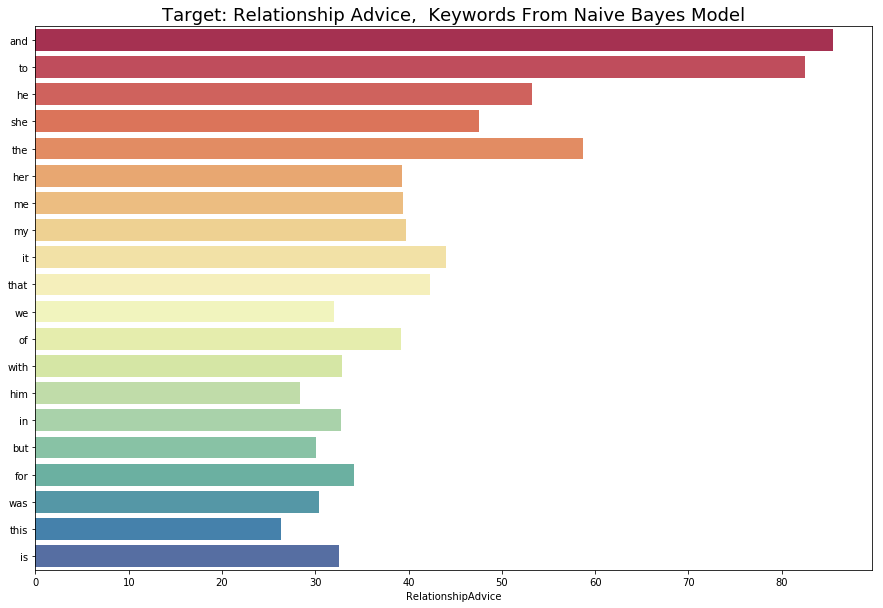

In [514]:
#plot counts 
plt.figure(figsize = (15,10))
plt.title('Target: Relationship Advice,  Keywords From Naive Bayes Model', fontsize = 18)
sns.barplot(y = relationship_word2.loc[nb_index,].index, 
            x = relationship_word2.loc[nb_index,]['RelationshipAdvice'],
            palette="Spectral")
plt.savefig('../images/RelationshipAdvice1(NB).png')

In [500]:
#sort by coefficients from highest to lowest, for Logit
womenrelationship_word2.sort_values(by = 'logit_coef_switched', ascending = False).head(20)

,nb_coef_switched,logit_coef_switched
and,-4.253006,3.018729
he,-4.614620,2.804925
she,-4.690114,2.611810
my,-4.910471,2.511056
me,-4.888376,2.441805
to,-4.334256,2.313939
her,-4.857493,2.157683
we,-5.104240,1.914438
him,-5.267039,1.575202
this,-5.392376,1.566193


In [501]:
#extract index for sorted logistic regression
logreg_index = womenrelationship_word2.sort_values(by = 'logit_coef_switched', ascending = False).head(20).index

In [502]:
relationship_word2.loc[logreg_index,]

,RelationshipAdvice,AskWomen
and,85.465545,55.908178
he,53.275884,33.657295
she,47.596756,32.701248
my,39.688089,27.064130
me,39.393445,27.556200
to,82.468045,56.510292
her,39.344212,28.572877
we,31.964147,21.343909
him,28.366012,16.560765
this,26.347732,15.673581


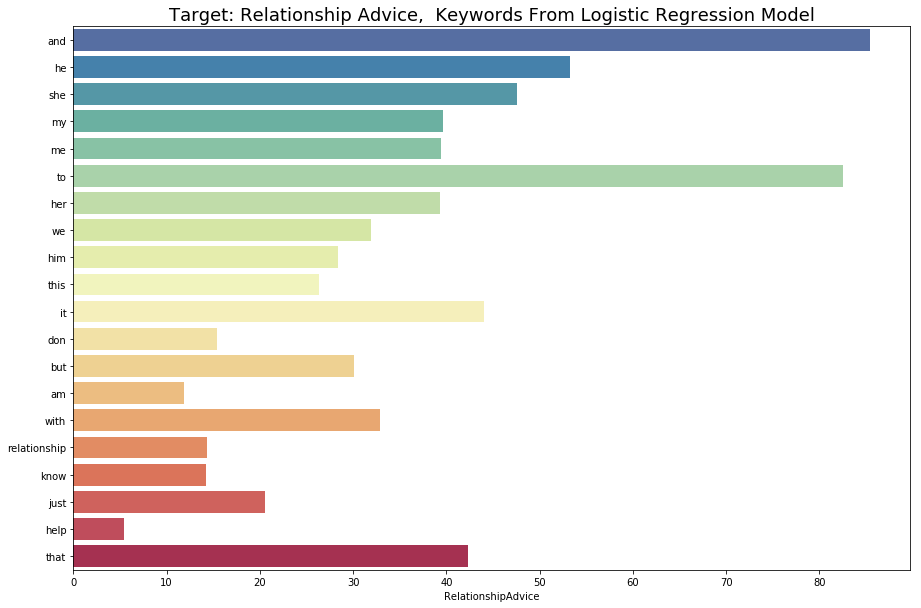

In [503]:
#plot counts 
plt.figure(figsize = (15,10))
plt.title('Target: Relationship Advice,  Keywords From Logistic Regression Model', fontsize = 18)
sns.barplot(y = relationship_word2.loc[logreg_index,].index, 
            x = relationship_word2.loc[logreg_index,]['RelationshipAdvice'],
            palette="Spectral_r")
plt.savefig('../images/RelationshipAdvice(1)_Keywords(logreg).png')